In [134]:
nocuts = Signal('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/cutflow_studies/nocuts/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root')

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/cutflow_studies/nocuts/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root


In [25]:
# tree = Signal(get_presel(700,400))
# presel = Signal('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/cutflow_studies/presel/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root')
presel = Signal('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/cutflow_studies/presel/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400_1M/ntuple.root')

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/cutflow_studies/presel/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400_1M/ntuple.root


In [26]:
presel.jet_pt, presel.jet_ptRegressed

(<Array [[232, 134, 64.4, ... 40.1, 37.2, 25]] type='569341 * var * float32'>,
 <Array [[232, 135, 61.5, ... 46.1, 46, 26]] type='569341 * var * float32'>)

In [27]:
btag_order = ak.argsort(presel.jet_btag, axis=1, ascending=False)
jet_pt = presel.jet_pt[btag_order][:,:6]
jet_pt_ordered = ak.sort(jet_pt, axis=1, ascending=False)

In [30]:
ptbins = np.linspace(0,300,101)

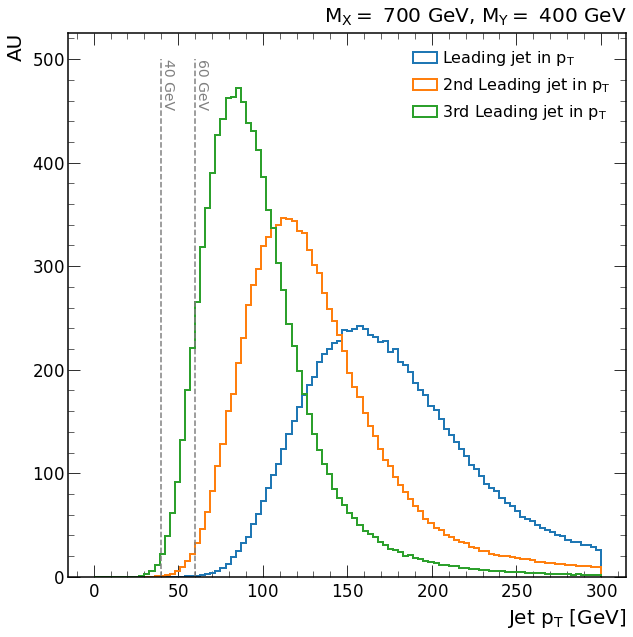

In [31]:
fig, ax = plt.subplots()

_ = presel.hist(jet_pt_ordered[:,0], bins=ptbins, ax=ax, label=r'Leading jet in $p_T$')
_ = presel.hist(jet_pt_ordered[:,1], bins=ptbins, ax=ax, label=r'2nd Leading jet in $p_T$')
_ = presel.hist(jet_pt_ordered[:,2], bins=ptbins, ax=ax, label=r'3rd Leading jet in $p_T$')

ax.plot([60,60],[0,500],color='gray', ls='--')
ax.plot([40,40],[0,500],color='gray', ls='--')
# ax.plot([60,60],[0,650],color='gray', ls='--')
# ax.plot([40,40],[0,650],color='gray', ls='--')

ax.text(60, 500, '60 GeV', rotation=270, color='gray', fontsize=14, va='top')
ax.text(40, 500, '40 GeV', rotation=270, color='gray', fontsize=14, va='top')

ax.set_xlabel(r'Jet $p_T$ [GeV]')

fig.savefig('plots/3_evt_selections/btag_pt/leading_3jet_pt_dists_700_400.pdf')

In [17]:
from utils.analysis.signal import Data, SixB

In [47]:
btag_pt = SixB('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root')
data_btag_pt = Data('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/JetHT_Data_UL/JetHT_Run2018_full/ntuple.root')
data_btag_pt.sample

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root


'59.7 fb$^{-1}$ (13 TeV, 2018)'

In [136]:
presel_HX_b1_mask = presel.jet_signalId == 0
presel_HX_b2_mask = presel.jet_signalId == 1
presel_H1_b1_mask = presel.jet_signalId == 2
presel_H1_b2_mask = presel.jet_signalId == 3
presel_H2_b1_mask = presel.jet_signalId == 4
presel_H2_b2_mask = presel.jet_signalId == 5

nocuts_HX_b1_mask = nocuts.jet_signalId == 0
nocuts_HX_b2_mask = nocuts.jet_signalId == 1
nocuts_H1_b1_mask = nocuts.jet_signalId == 2
nocuts_H1_b2_mask = nocuts.jet_signalId == 3
nocuts_H2_b1_mask = nocuts.jet_signalId == 4
nocuts_H2_b2_mask = nocuts.jet_signalId == 5

In [137]:
nocuts.jet_btag[nocuts_HX_b1_mask]

<Array [[0.992], [0.998], ... [0.425], [0.965]] type='96552 * var * float32'>

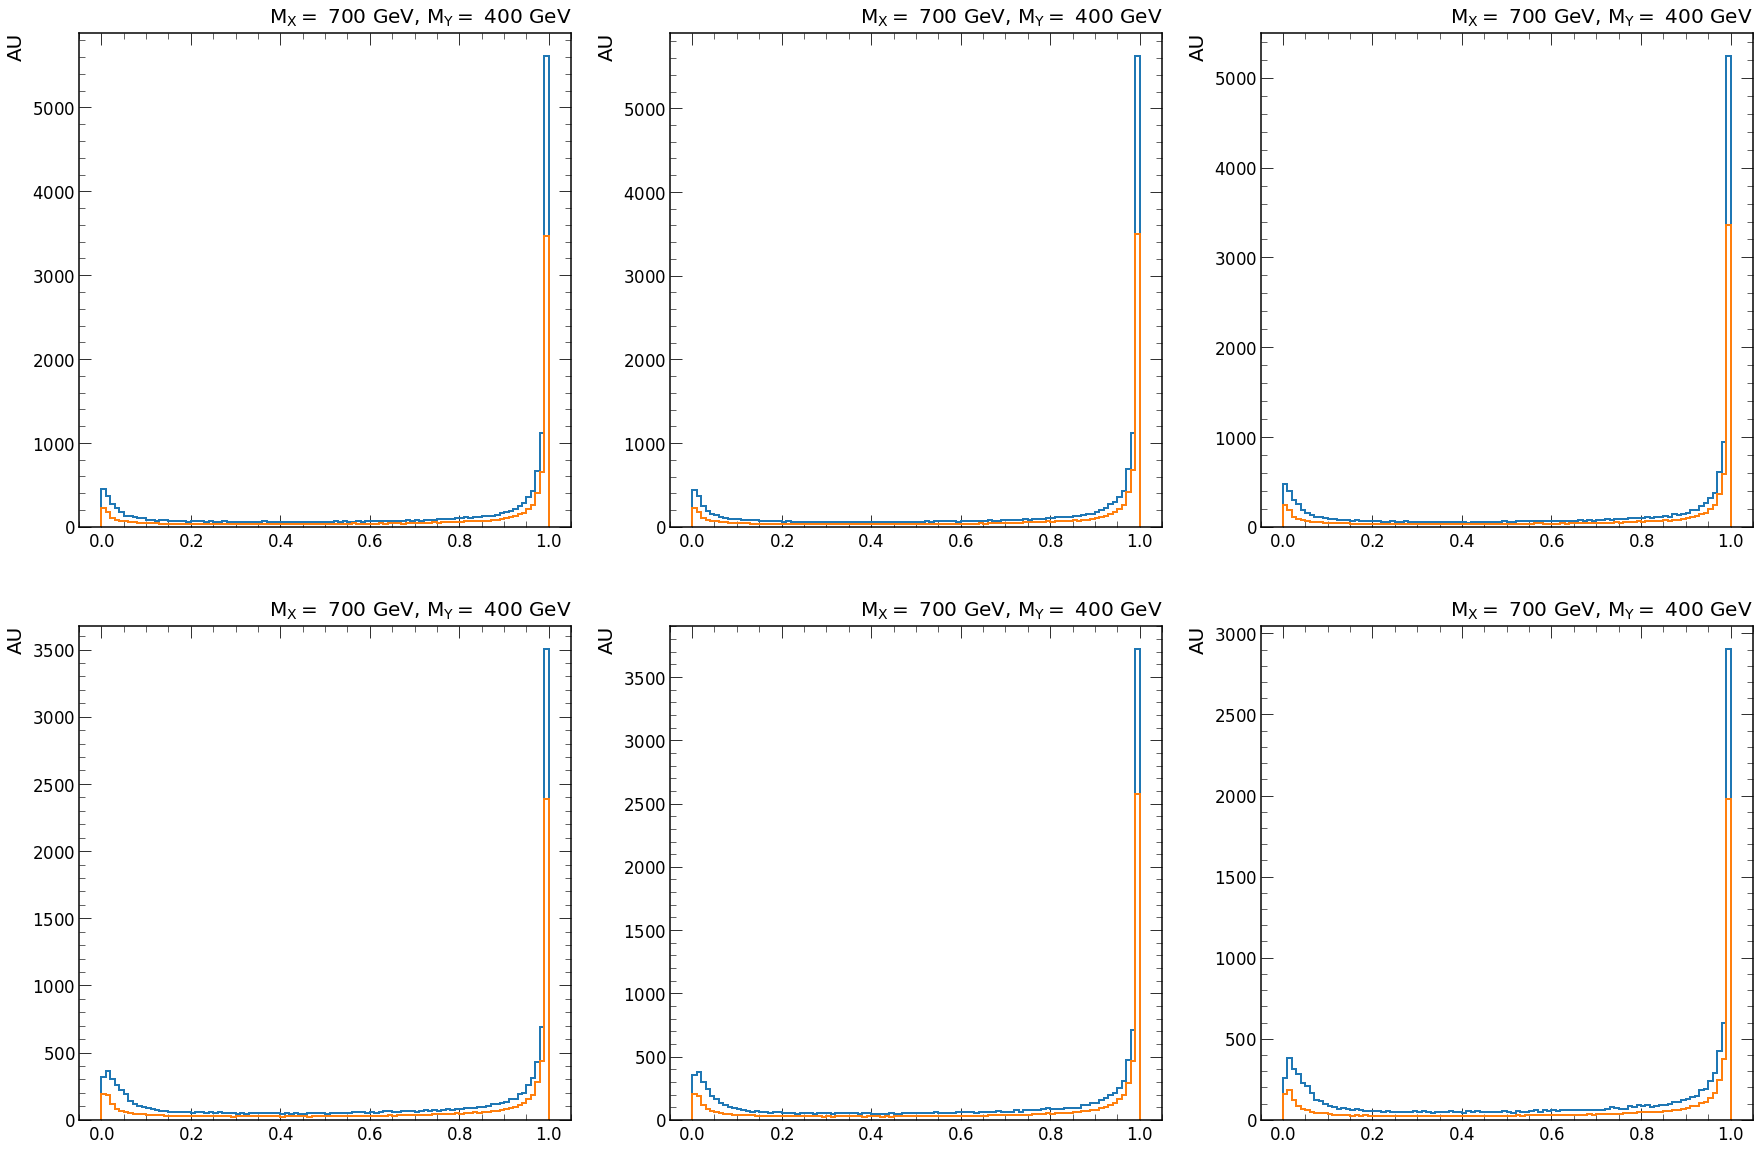

In [144]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30,20))

_ = nocuts.hist(nocuts.jet_btag[nocuts_HX_b1_mask], bins=score_bins, ax=axs[0][0])
_ = presel.hist(presel.jet_btag[presel_HX_b1_mask], bins=score_bins, ax=axs[0][0])

_ = nocuts.hist(nocuts.jet_btag[nocuts_H1_b1_mask], bins=score_bins, ax=axs[0][1])
_ = presel.hist(presel.jet_btag[presel_H1_b1_mask], bins=score_bins, ax=axs[0][1])

_ = nocuts.hist(nocuts.jet_btag[nocuts_H2_b1_mask], bins=score_bins, ax=axs[0][2])
_ = presel.hist(presel.jet_btag[presel_H2_b1_mask], bins=score_bins, ax=axs[0][2])

_ = nocuts.hist(nocuts.jet_btag[nocuts_HX_b2_mask], bins=score_bins, ax=axs[1][0])
_ = presel.hist(presel.jet_btag[presel_HX_b2_mask], bins=score_bins, ax=axs[1][0])

_ = nocuts.hist(nocuts.jet_btag[nocuts_H1_b2_mask], bins=score_bins, ax=axs[1][1])
_ = presel.hist(presel.jet_btag[presel_H1_b2_mask], bins=score_bins, ax=axs[1][1])

_ = nocuts.hist(nocuts.jet_btag[nocuts_H2_b2_mask], bins=score_bins, ax=axs[1][2])
_ = presel.hist(presel.jet_btag[presel_H2_b2_mask], bins=score_bins, ax=axs[1][2])

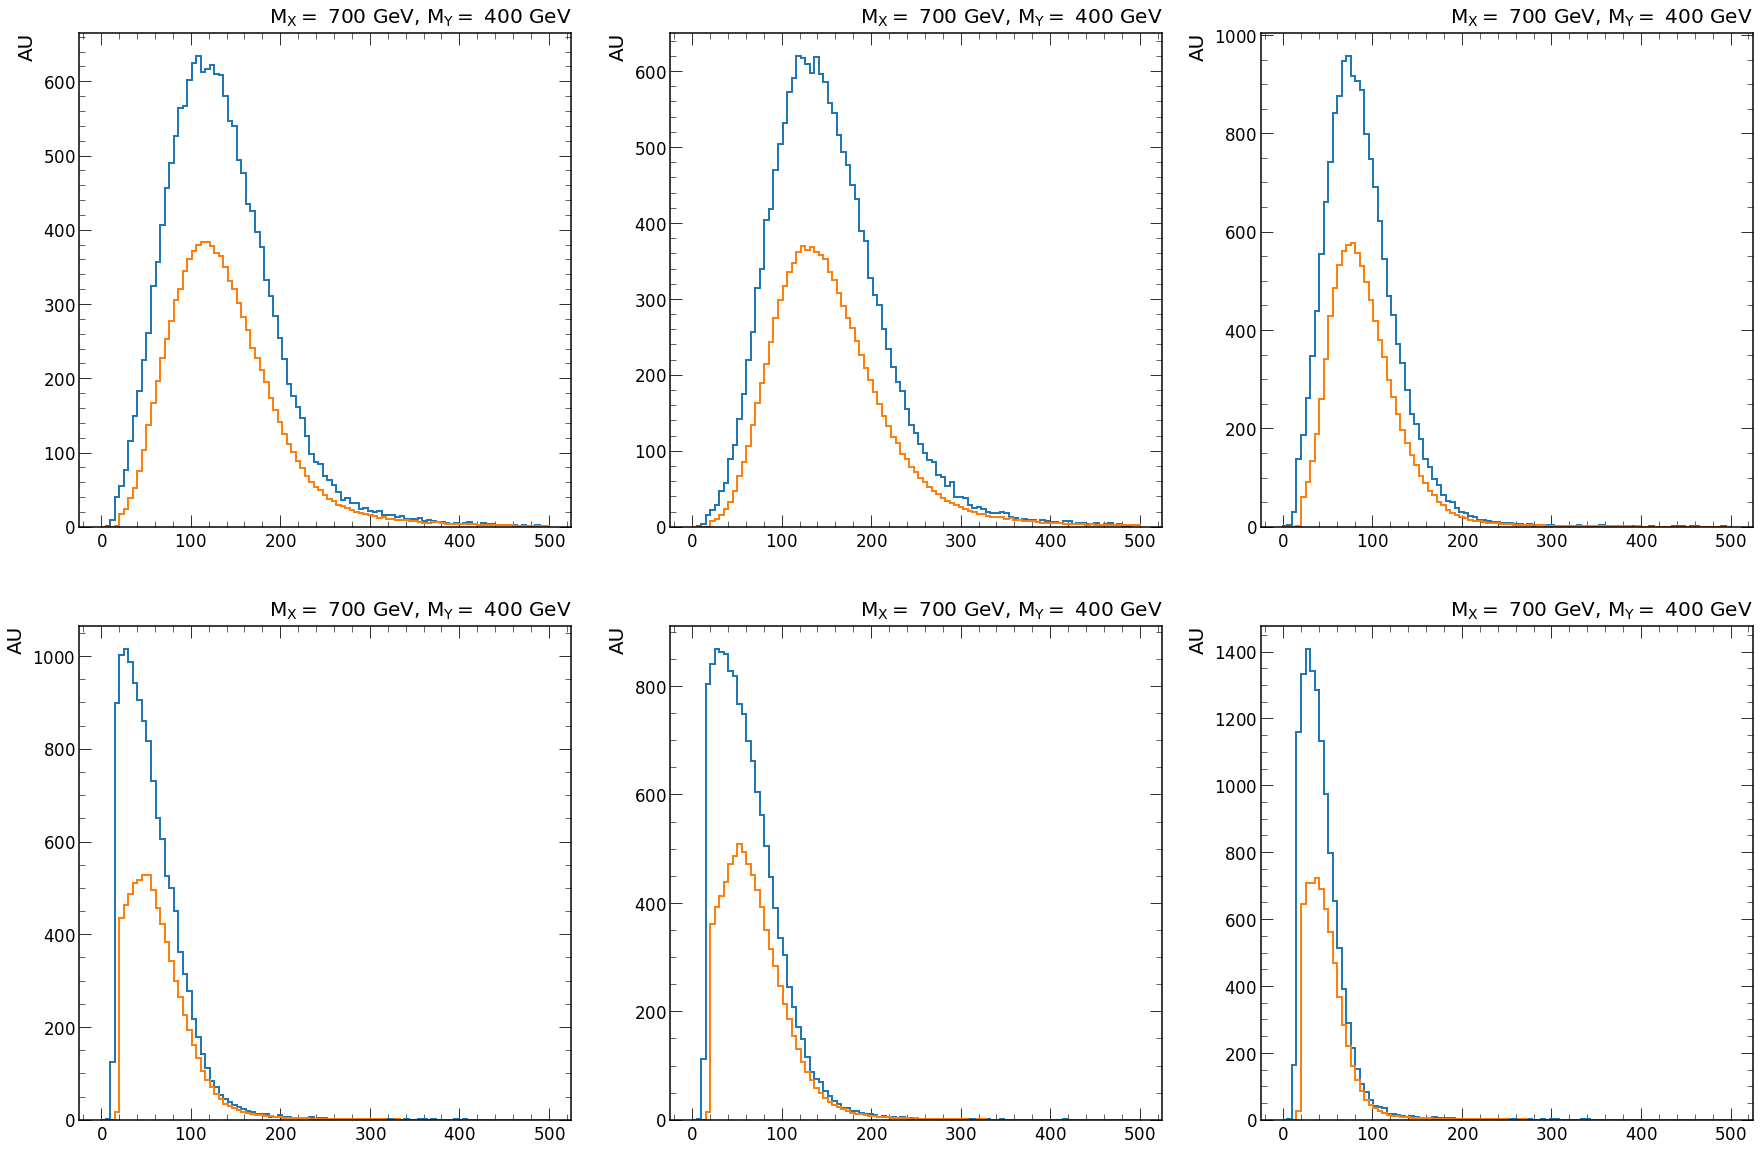

In [145]:
pt_bins = np.linspace(0,500,100)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30,20))

_ = nocuts.hist(nocuts.jet_pt[nocuts_HX_b1_mask], bins=pt_bins, ax=axs[0][0])
_ = presel.hist(presel.jet_pt[presel_HX_b1_mask], bins=pt_bins, ax=axs[0][0])

_ = nocuts.hist(nocuts.jet_pt[nocuts_H1_b1_mask], bins=pt_bins, ax=axs[0][1])
_ = presel.hist(presel.jet_pt[presel_H1_b1_mask], bins=pt_bins, ax=axs[0][1])

_ = nocuts.hist(nocuts.jet_pt[nocuts_H2_b1_mask], bins=pt_bins, ax=axs[0][2])
_ = presel.hist(presel.jet_pt[presel_H2_b1_mask], bins=pt_bins, ax=axs[0][2])

_ = nocuts.hist(nocuts.jet_pt[nocuts_HX_b2_mask], bins=pt_bins, ax=axs[1][0])
_ = presel.hist(presel.jet_pt[presel_HX_b2_mask], bins=pt_bins, ax=axs[1][0])

_ = nocuts.hist(nocuts.jet_pt[nocuts_H1_b2_mask], bins=pt_bins, ax=axs[1][1])
_ = presel.hist(presel.jet_pt[presel_H1_b2_mask], bins=pt_bins, ax=axs[1][1])

_ = nocuts.hist(nocuts.jet_pt[nocuts_H2_b2_mask], bins=pt_bins, ax=axs[1][2])
_ = presel.hist(presel.jet_pt[presel_H2_b2_mask], bins=pt_bins, ax=axs[1][2])

In [127]:
tree.nevents

569341

In [33]:
sixbs_in_event = ak.sum(tree.jet_signalId > -1, axis=1) == 6
fivebs_in_event = ak.sum(tree.jet_signalId > -1, axis=1) == 5

In [34]:
HX_b1_btag = tree.jet_btag[HX_b1_mask]
HX_b2_btag = tree.jet_btag[HX_b2_mask]
H1_b1_btag = tree.jet_btag[H1_b1_mask]
H1_b2_btag = tree.jet_btag[H1_b2_mask]
H2_b1_btag = tree.jet_btag[H2_b1_mask]
H2_b2_btag = tree.jet_btag[H2_b2_mask]

In [35]:
ak.flatten(HX_b1_btag),ak.flatten(HX_b2_btag)

(<Array [0.998, 0.946, 0.995, ... 0.991, 0.989] type='555963 * float32'>,
 <Array [0.0429, 0.335, 0.989, ... 0.99, 0.988] type='417476 * float32'>)

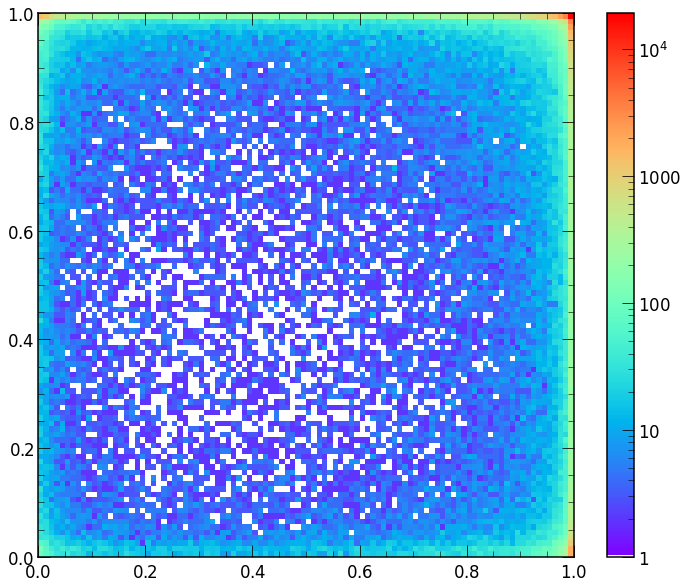

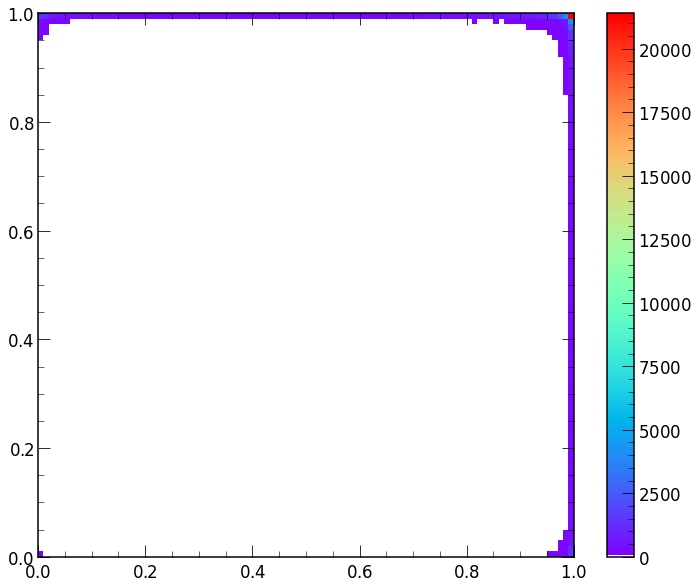

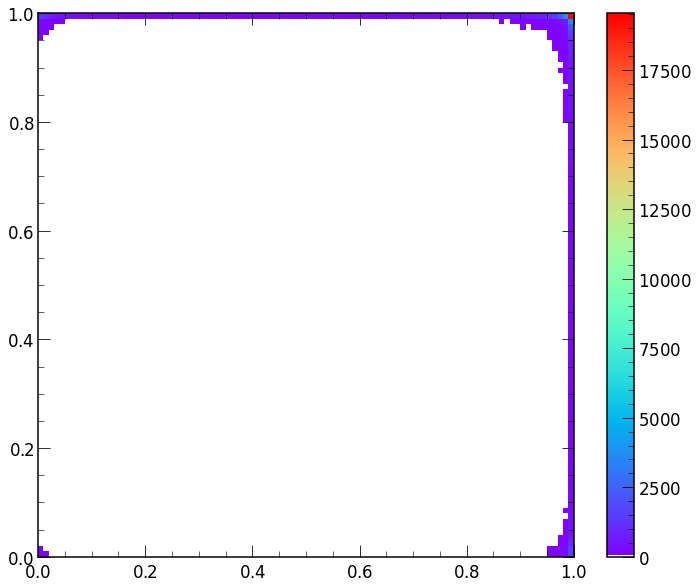

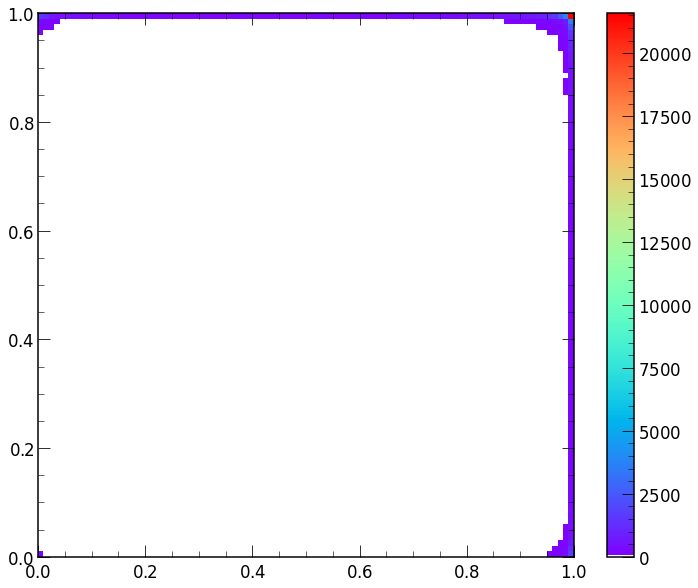

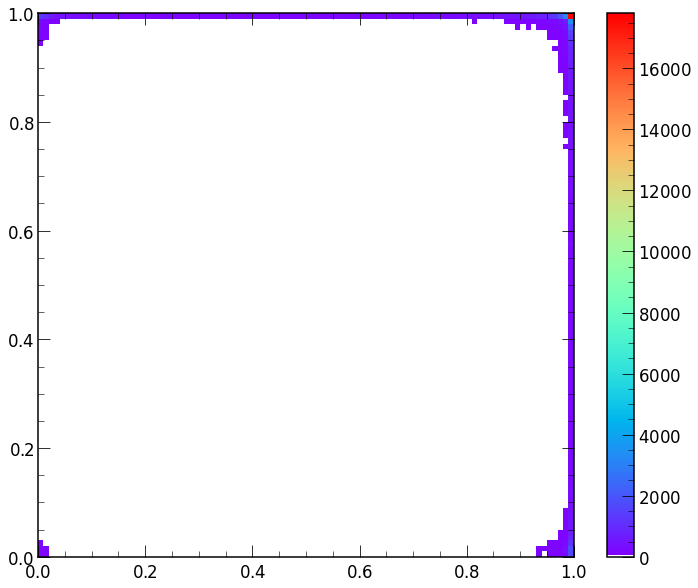

In [128]:
fig, ax = plt.subplots(figsize=(12,10))
n, xe, ye, im = Hist2d(HX_b1_btag[sixbs_in_event], HX_b2_btag[sixbs_in_event], bins=score_bins, ax=ax, log=True)
fig.colorbar(im, ax=ax)

fig, ax = plt.subplots(figsize=(12,10))
n, xe, ye, im = Hist2d(HX_b1_btag[sixbs_in_event], H1_b1_btag[sixbs_in_event], bins=score_bins, ax=ax)
fig.colorbar(im, ax=ax)

fig, ax = plt.subplots(figsize=(12,10))
n, xe, ye, im = Hist2d(HX_b1_btag[sixbs_in_event], H1_b2_btag[sixbs_in_event], bins=score_bins, ax=ax)
fig.colorbar(im, ax=ax)

fig, ax = plt.subplots(figsize=(12,10))
n, xe, ye, im = Hist2d(HX_b1_btag[sixbs_in_event], H2_b1_btag[sixbs_in_event], bins=score_bins, ax=ax)
fig.colorbar(im, ax=ax)

fig, ax = plt.subplots(figsize=(12,10))
n, xe, ye, im = Hist2d(HX_b1_btag[sixbs_in_event], H2_b2_btag[sixbs_in_event], bins=score_bins, ax=ax)
fig.colorbar(im, ax=ax)

array([ 66.61575317,  78.13772583,  50.12628174,  35.4307251 ,
        28.22625732,  24.49862671,  20.68136597,  18.85620117,
        16.63687134,  16.4755249 ,  14.96975708,  13.78634644,
        12.45977783,  12.63894653,  12.9079895 ,  11.59918213,
        12.02938843,  11.09719849,  11.76062012,  10.88220215,
        10.29055786,  11.02563477,  10.20092773,  10.72064209,
        10.30841064,  10.32635498,  10.34423828,   9.91394043,
         9.84228516,  10.07531738,  11.02563477,  10.72070312,
        10.57727051,   9.91394043,  10.21337891,  10.6595459 ,
        10.42675781,  10.44451904,  10.48052979,  10.98205566,
         9.51348877,  10.35614014,   9.78240967,  10.01550293,
        10.40942383,  11.03668213,   9.67492676,  10.40942383,
        10.28417969,  10.28424072,  11.30535889,  11.59234619,
        11.41265869,  10.91125488,  12.45196533,  12.09350586,
        12.03997803,  12.20111084,  11.48461914,  11.32324219,
        12.75671387,  11.57421875,  12.32672119,  12.27

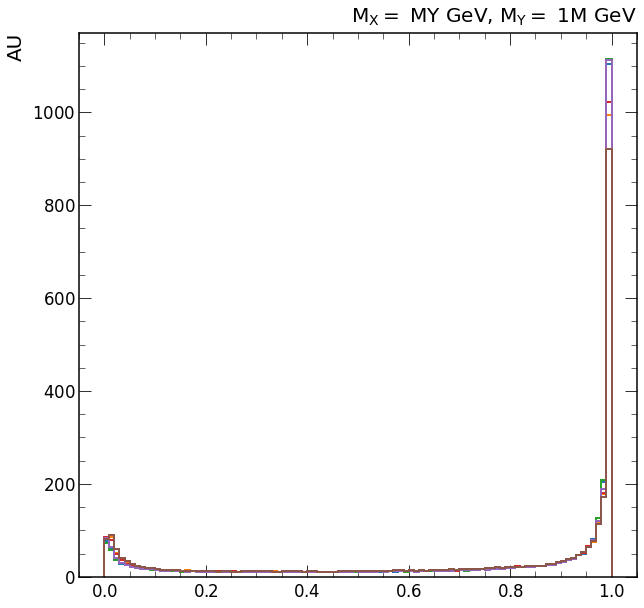

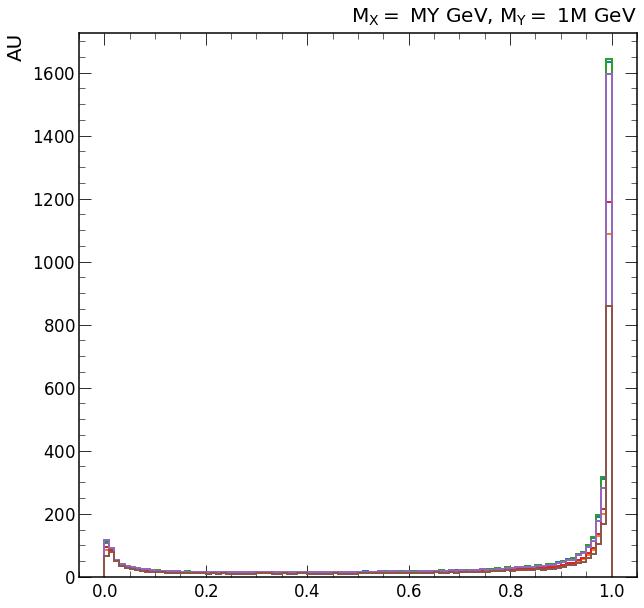

In [38]:
fig, ax = plt.subplots()

tree.hist(HX_b1_btag[sixbs_in_event], bins=score_bins, ax=ax)
tree.hist(HX_b2_btag[sixbs_in_event], bins=score_bins, ax=ax)
tree.hist(H1_b1_btag[sixbs_in_event], bins=score_bins, ax=ax)
tree.hist(H1_b2_btag[sixbs_in_event], bins=score_bins, ax=ax)
tree.hist(H2_b1_btag[sixbs_in_event], bins=score_bins, ax=ax)
tree.hist(H2_b2_btag[sixbs_in_event], bins=score_bins, ax=ax)

fig, ax = plt.subplots()

tree.hist(HX_b1_btag[fivebs_in_event], bins=score_bins, ax=ax)
tree.hist(HX_b2_btag[fivebs_in_event], bins=score_bins, ax=ax)
tree.hist(H1_b1_btag[fivebs_in_event], bins=score_bins, ax=ax)
tree.hist(H1_b2_btag[fivebs_in_event], bins=score_bins, ax=ax)
tree.hist(H2_b1_btag[fivebs_in_event], bins=score_bins, ax=ax)
tree.hist(H2_b2_btag[fivebs_in_event], bins=score_bins, ax=ax)

In [71]:
assert ak.all(tree.gen_HX_b1_recojet_btag[sixbs_in_event] == ak.flatten(tree.jet_btag[tree.jet_signalId == 0][sixbs_in_event]))

In [73]:
avg_btag_score = ak.mean(tree.jet_btag[tree.jet_signalId > -1], axis=1)[sixbs_in_event]

In [4]:
mh_bins = np.linspace(50,200,101)
score_bins = np.linspace(0,1.01,101)

In [7]:
btag_pt.avg_btag

array([0.90234375, 0.8593343 , 0.7992961 , ..., 0.8353984 , 0.7879092 ,
       0.56456757], dtype=float32)

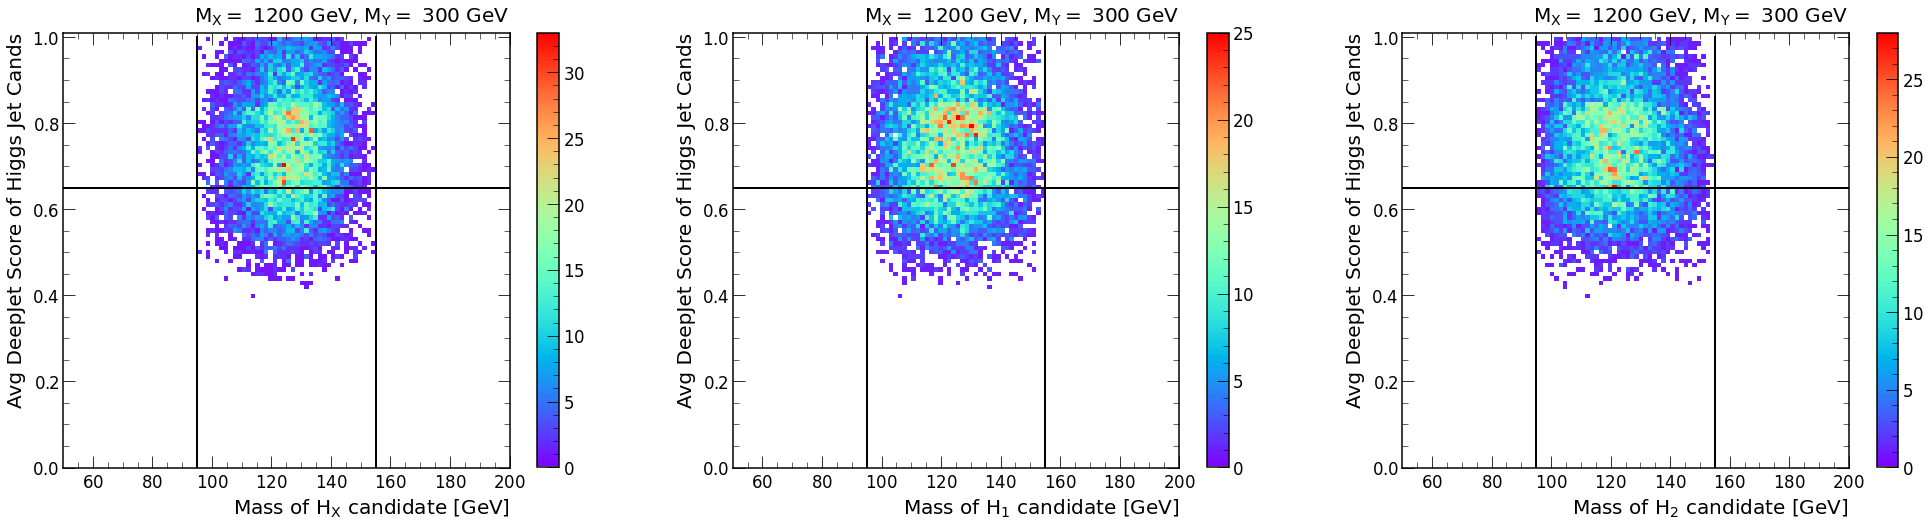

In [48]:
fig, axs = plt.subplots(figsize=(34,8), nrows=1, ncols=3)

mask = btag_pt.A_SR_mask
# mask = np.ones_like(btag_pt.A_SR_mask)

ax = axs[0]
n, xe, ye, im = Hist2d(btag_pt.HX_m[mask], btag_pt.btag_avg[mask], bins=[mh_bins, score_bins], ax=ax)
fig.colorbar(im, ax=ax)

ax.plot([0,200],[0.65,0.65], color='k', lw=2)
ax.plot([95,95],[0,1], color='k', lw=2)
ax.plot([155,155],[0,1], color='k', lw=2)

ax.set_xlabel(r"Mass of $H_X$ candidate [GeV]")
ax.set_ylabel("Avg DeepJet Score of Higgs Jet Cands")
ax.set_title(btag_pt.sample)

# <!-- fig.savefig('plots/6_background_modeling/matched_MX_v_avgb.pdf') -->

# fig, ax = plt.subplots(figsize=(12,10))

ax = axs[1]

n, xe, ye, im = Hist2d(btag_pt.H1_m[mask], btag_pt.btag_avg[mask], bins=[mh_bins, score_bins], ax=ax)
fig.colorbar(im, ax=ax)

ax.plot([0,200],[0.65,0.65], color='k', lw=2)
ax.plot([95,95],[0,1], color='k', lw=2)
ax.plot([155,155],[0,1], color='k', lw=2)

ax.set_xlabel(r"Mass of $H_1$ candidate [GeV]")
ax.set_ylabel("Avg DeepJet Score of Higgs Jet Cands")
ax.set_title(btag_pt.sample)

# <!-- fig.savefig('plots/6_background_modeling/matched_M1_v_avgb.pdf') -->

# fig, ax = plt.subplots(figsize=(12,10))

ax = axs[2]

n, xe, ye, im = Hist2d(btag_pt.H2_m[mask], btag_pt.btag_avg[mask], bins=[mh_bins, score_bins], ax=ax)
fig.colorbar(im, ax=ax)

ax.plot([0,200],[0.65,0.65], color='k', lw=2)
ax.plot([95,95],[0,1], color='k', lw=2)
ax.plot([155,155],[0,1], color='k', lw=2)

ax.set_xlabel(r"Mass of $H_2$ candidate [GeV]")
ax.set_ylabel("Avg DeepJet Score of Higgs Jet Cands")
ax.set_title(btag_pt.sample)

# <!-- fig.savefig('plots/6_background_modeling/matched_M2_v_avgb.pdf') -->

fig.savefig("plots/6_background_modeling/mh_v_avgb_1200_300_asr.pdf")

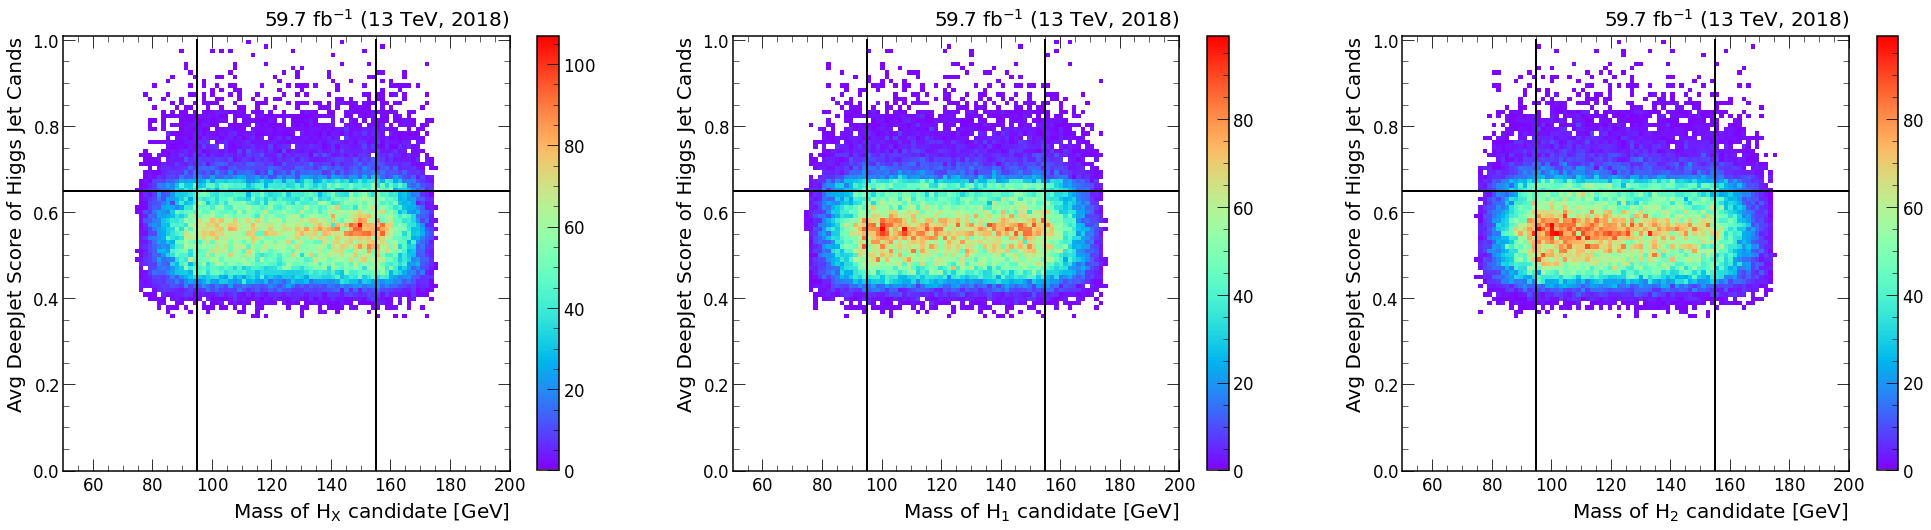

In [45]:
fig, axs = plt.subplots(figsize=(34,8), nrows=1, ncols=3)

ax = axs[0]

n, xe, ye, im = Hist2d(data_btag_pt.HX_m[data_btag_pt.A_CR_mask], data_btag_pt.btag_avg[data_btag_pt.A_CR_mask], bins=[mh_bins, score_bins], ax=ax)
fig.colorbar(im, ax=ax)

ax.plot([0,200],[0.65,0.65], color='k', lw=2)
ax.plot([95,95],[0,1], color='k', lw=2)
ax.plot([155,155],[0,1], color='k', lw=2)

ax.set_xlabel(r"Mass of $H_X$ candidate [GeV]")
ax.set_ylabel("Avg DeepJet Score of Higgs Jet Cands")
ax.set_title(data_btag_pt.sample)

# <!-- fig.savefig('plots/6_background_modeling/matched_MX_v_avgb.pdf') -->

# fig, ax = plt.subplots(figsize=(12,10))

ax = axs[1]

n, xe, ye, im = Hist2d(data_btag_pt.H1_m[data_btag_pt.A_CR_mask], data_btag_pt.btag_avg[data_btag_pt.A_CR_mask], bins=[mh_bins, score_bins], ax=ax)
fig.colorbar(im, ax=ax)

ax.plot([0,200],[0.65,0.65], color='k', lw=2)
ax.plot([95,95],[0,1], color='k', lw=2)
ax.plot([155,155],[0,1], color='k', lw=2)

ax.set_xlabel(r"Mass of $H_1$ candidate [GeV]")
ax.set_ylabel("Avg DeepJet Score of Higgs Jet Cands")
ax.set_title(data_btag_pt.sample)

# <!-- fig.savefig('plots/6_background_modeling/matched_M1_v_avgb.pdf') -->

# fig, ax = plt.subplots(figsize=(12,10))

ax = axs[2]

n, xe, ye, im = Hist2d(data_btag_pt.H2_m[data_btag_pt.A_CR_mask], data_btag_pt.btag_avg[data_btag_pt.A_CR_mask], bins=[mh_bins, score_bins], ax=ax)
fig.colorbar(im, ax=ax)

ax.plot([0,200],[0.65,0.65], color='k', lw=2)
ax.plot([95,95],[0,1], color='k', lw=2)
ax.plot([155,155],[0,1], color='k', lw=2)

ax.set_xlabel(r"Mass of $H_2$ candidate [GeV]")
ax.set_ylabel("Avg DeepJet Score of Higgs Jet Cands")
ax.set_title(data_btag_pt.sample)

# <!-- fig.savefig('plots/6_background_modeling/matched_M2_v_avgb.pdf') -->

fig.savefig("plots/6_background_modeling/mh_v_avgb_data_acr.pdf")

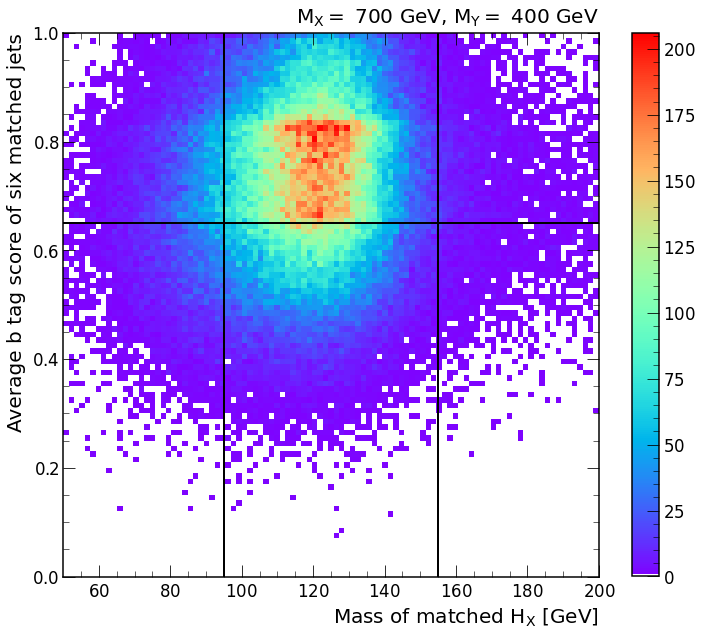

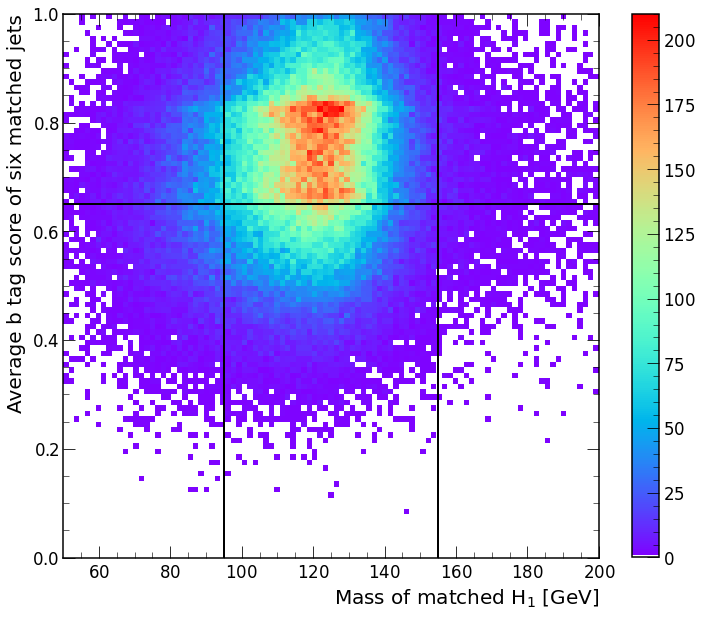

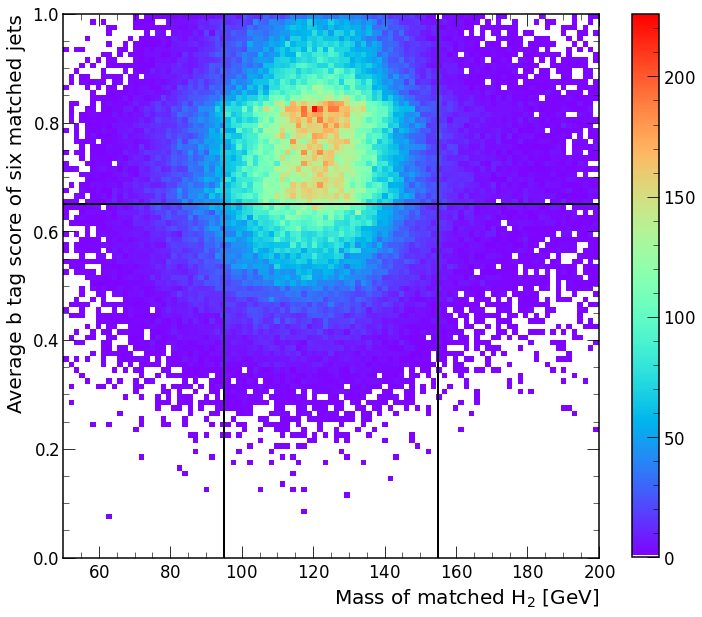

In [126]:
fig, ax = plt.subplots(figsize=(12,10))

n, xe, ye, im = Hist2d(ak.flatten(tree.matched_HX.m), avg_btag_score, bins=[mh_bins, score_bins], ax=ax)
fig.colorbar(im, ax=ax)

ax.plot([0,200],[0.65,0.65], color='k', lw=2)
ax.plot([95,95],[0,1], color='k', lw=2)
ax.plot([155,155],[0,1], color='k', lw=2)

ax.set_xlabel(r"Mass of matched $H_X$ [GeV]")
ax.set_ylabel("Average b tag score of six matched jets")
ax.set_title(tree.sample)

fig.savefig('plots/6_background_modeling/matched_MX_v_avgb.pdf')

fig, ax = plt.subplots(figsize=(12,10))

n, xe, ye, im = Hist2d(ak.flatten(tree.matched_H1.m), avg_btag_score, bins=[mh_bins, score_bins], ax=ax)
fig.colorbar(im, ax=ax)

ax.plot([0,200],[0.65,0.65], color='k', lw=2)
ax.plot([95,95],[0,1], color='k', lw=2)
ax.plot([155,155],[0,1], color='k', lw=2)

ax.set_xlabel(r"Mass of matched $H_1$ [GeV]")
ax.set_ylabel("Average b tag score of six matched jets")

fig.savefig('plots/6_background_modeling/matched_M1_v_avgb.pdf')

fig, ax = plt.subplots(figsize=(12,10))

n, xe, ye, im = Hist2d(ak.flatten(tree.matched_H2.m), avg_btag_score, bins=[mh_bins, score_bins], ax=ax)
fig.colorbar(im, ax=ax)

ax.plot([0,200],[0.65,0.65], color='k', lw=2)
ax.plot([95,95],[0,1], color='k', lw=2)
ax.plot([155,155],[0,1], color='k', lw=2)

ax.set_xlabel(r"Mass of matched $H_2$ [GeV]")
ax.set_ylabel("Average b tag score of six matched jets")

fig.savefig('plots/6_background_modeling/matched_M2_v_avgb.pdf')

In [106]:
reco_avg_btag = np.average(np.column_stack((
    tree.HX_b1_btag,
    tree.HX_b2_btag,
    tree.H1_b1_btag,
    tree.H1_b2_btag,
    tree.H2_b1_btag,
    tree.H2_b2_btag
)), axis=1)[sixbs_in_event]

Text(0, 1, 'Average b tag score of six reco jets')

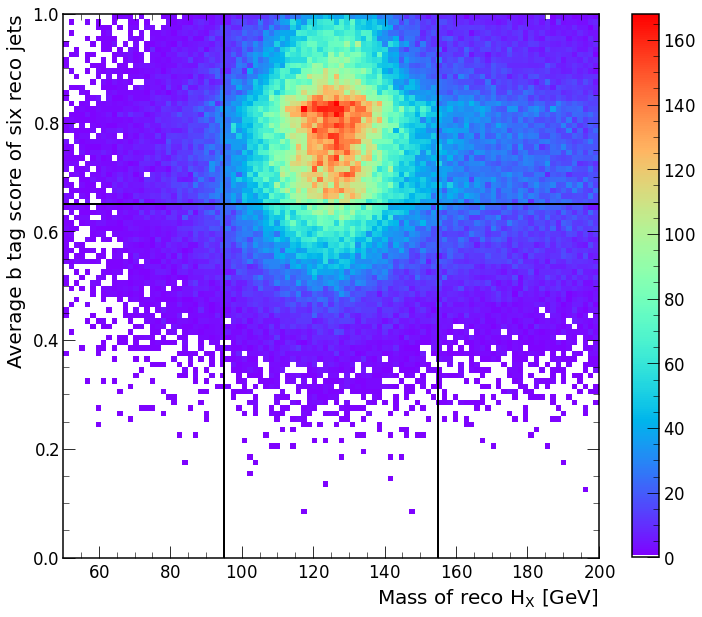

In [108]:
fig, ax = plt.subplots(figsize=(12,10))

n, xe, ye, im = Hist2d(tree.HX_m[sixbs_in_event], reco_avg_btag, bins=[mh_bins, score_bins], ax=ax)
fig.colorbar(im, ax=ax)

ax.plot([0,200],[0.65,0.65], color='k', lw=2)
ax.plot([95,95],[0,1], color='k', lw=2)
ax.plot([155,155],[0,1], color='k', lw=2)

ax.set_xlabel(r"Mass of reco $H_X$ [GeV]")
ax.set_ylabel("Average b tag score of six reco jets")

fig.savefig('plots/6_background_modeling/reco_MX_v_avgb.pdf')

In [5]:
btag_sort_ind = ak.argsort(tree.jet_btag, axis=1, ascending=False)
tree.jet_signalId[btag_sort_ind]

<Array [[3, 2, 0, 4, 5, ... -1, -1, -1, -1]] type='569341 * var * int32'>

In [34]:
n_pre = ak.sum(tree.jet_signalId[btag_sort_ind] > -1, axis=1)
n_sig_six = ak.sum(tree.jet_signalId[btag_sort_ind][:,:6] > -1, axis=1)
n_sig_six

<Array [6, 4, 5, 4, 4, 4, ... 4, 5, 5, 5, 6, 5] type='569341 * int64'>

array([1.79220000e-02, 8.96100000e-01, 2.91770160e+01, 4.40379384e+02,
       2.50017277e+03, 4.97240513e+03, 2.26068108e+03])

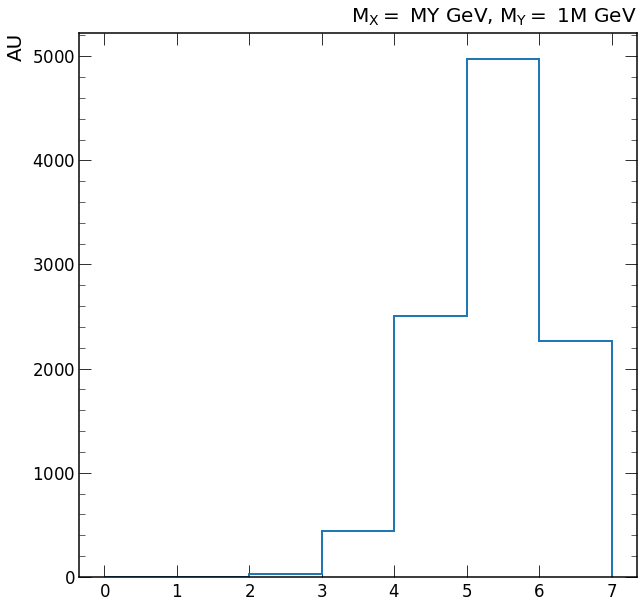

In [32]:
fig, ax = plt.subplots()

tree.hist(n_sig, bins=np.arange(8), ax=ax)

In [39]:
ak.sum(n_pre == 2) / tree.nevents

0.0014982233845797159

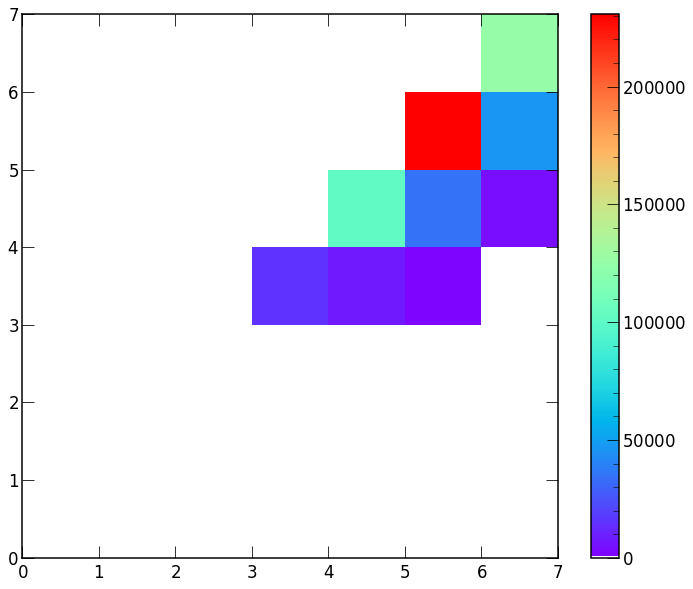

In [41]:
fig, ax = plt.subplots(figsize=(12,10))

n, xe, ye, im = Hist2d(n_pre, n_sig_six, bins=np.arange(8), ax=ax)
fig.colorbar(im, ax=ax)
ax.minorticks_off()

In [17]:
heights = ak.sum(tree.jet_signalId[btag_sort_ind] == -1, axis=0) / ak.count(tree.jet_signalId[btag_sort_ind], axis=0)

In [8]:
njet_bins = np.arange(-1,7)

<BarContainer object of 18 artists>

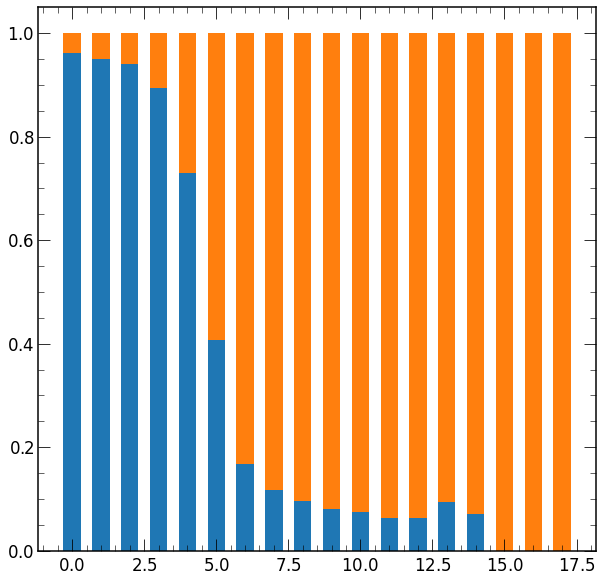

In [27]:
fig, ax = plt.subplots()

width = 0.6
ax.bar(np.arange(18), height=1-heights, width=width)
ax.bar(np.arange(18), height=heights, width=width, bottom=1-heights)

# fig, ax = plt.subplots()

# width = 0.4
# ax.bar(np.arange(18), height=[1-heights, heights], width=width)
# ax.bar(np.arange(18) + width/2, height=heights, width=width)




In [122]:
sorted_btag = ak.sort(presel.jet_btag, axis=1, ascending=False)

In [123]:
val = 1+1e-6

In [124]:
tight_eff_height = []
med_eff_height = []
loose_eff_height = []
for i in range(6):
    tight_b_eff = int(round(ak.sum(sorted_btag[:,i] > jet_btagWP[-1]) / len(sorted_btag),2)*100)
    med_b_eff = int(round(ak.sum(sorted_btag[:,i] > jet_btagWP[-2]) / len(sorted_btag),2)*100)
    loose_b_eff = int(round(ak.sum(sorted_btag[:,i] > jet_btagWP[1]) / len(sorted_btag),2)*100)
    # med_b_eff = int(round(ak.sum(sorted_btag[:,i] > jet_btagWP[-2]) / len(sorted_btag),2)*100)
    print(tight_b_eff)
    tight_eff_height.append(tight_b_eff)
    med_eff_height.append(med_b_eff)
    loose_eff_height.append(loose_b_eff)

100
97
83
52
20
3


In [125]:
presel.sample

'$M_X=$ 1200 GeV, $M_Y=$ 300 GeV'

In [99]:
x_label = [f'Jet {i}' for i in range(1,7)]
ticks = np.arange(6)

In [100]:
# mc bkg eff pulled from dnn_check.ipynb
mc_tight_eff = [87, 46, 8, 0, 0, 0]
mc_med_eff = [96, 75, 26, 4, 0, 0]
mc_loose_eff = [99, 95, 71, 29, 6, 0]

In [101]:
mc_tight_eff = [94, 66, 18, 3, 0, 0]
mc_med_eff = [99, 89, 43, 10, 0, 0]
mc_loose_eff = [99, 99, 81, 39, 10, 1]

In [45]:
# t = Signal('/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixB/analysis/sixBanalysis/output.root')
t.cutflow

array([1000.,  700.,  583.,  583.], dtype=float32)

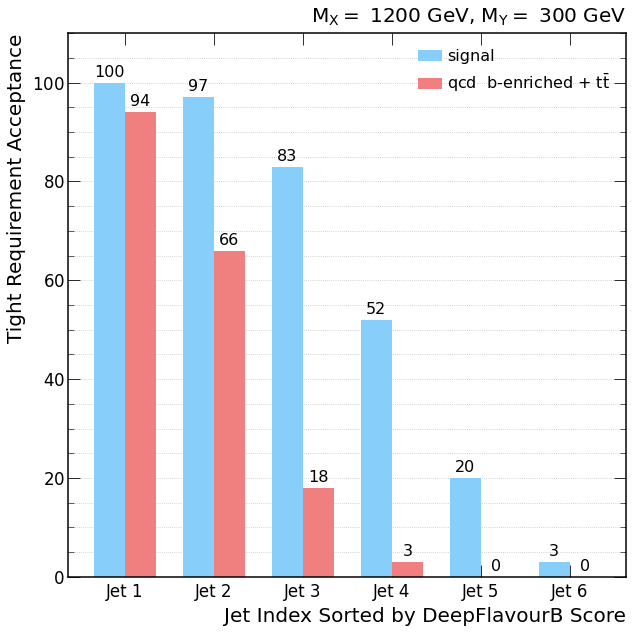

In [126]:
fig, ax = plt.subplots()

width = 0.35
x_sig = ticks - width/2
x_bkg = ticks + width/2

rects1 = ax.bar(x_sig, tight_eff_height, width=width, color='lightskyblue', zorder=2, label='signal')
rects2 = ax.bar(x_bkg, mc_tight_eff, width=width, color='lightcoral', zorder=2, label=r'qcd  b-enriched + $t\bar{t}$')
ax.grid(axis='y', which='both')

ax.set_xlabel('Jet Index Sorted by DeepFlavourB Score')

ax.set_xticks(ticks, x_label)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

ax.bar_label(rects1, padding=3, fontsize=16)
ax.bar_label(rects2, padding=3, fontsize=16)
ax.set_ylim(0, 110)

ax.set_ylabel('Tight Requirement Acceptance')

ax.set_title(presel.sample)

ax.legend()

# ax.tick_params(axis='x', which='minor', color='C0')
fig.savefig(f'plots/2_preselections/{presel.mxmy}_tight_jet_eff.pdf')

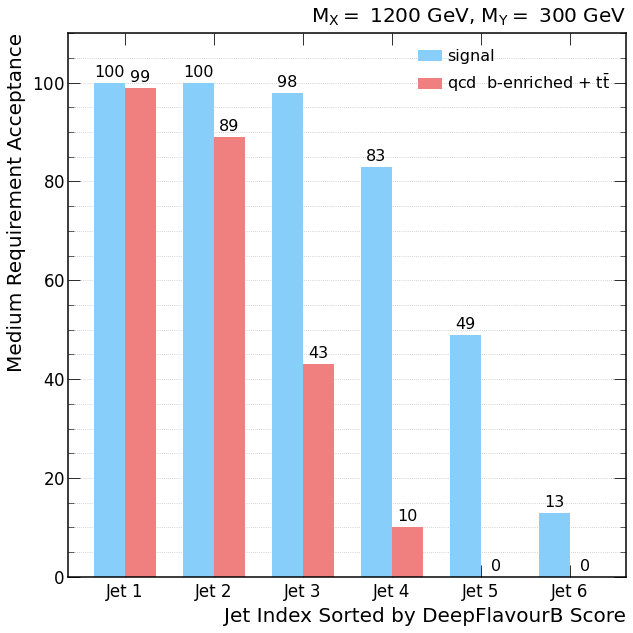

In [127]:
fig, ax = plt.subplots()

width = 0.35
x_sig = ticks - width/2
x_bkg = ticks + width/2

rects1 = ax.bar(x_sig, med_eff_height, width=width, color='lightskyblue', zorder=2, label='signal')
rects2 = ax.bar(x_bkg, mc_med_eff, width=width, color='lightcoral', zorder=2, label=r'qcd  b-enriched + $t\bar{t}$')

# rects = ax.bar(ticks, med_eff_height, color='lightskyblue', zorder=2)
ax.grid(axis='y', which='both')

ax.set_xlabel('Jet Index Sorted by DeepFlavourB Score')

ax.set_xticks(ticks, x_label)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

ax.bar_label(rects1, padding=3, fontsize=16)
ax.bar_label(rects2, padding=3, fontsize=16)
ax.set_ylim(0, 110)

ax.set_ylabel('Medium Requirement Acceptance')

ax.set_title(presel.sample)

ax.legend()

# ax.tick_params(axis='x', which='minor', color='C0')
fig.savefig(f'plots/2_preselections/{presel.mxmy}_medium_jet_eff.pdf')

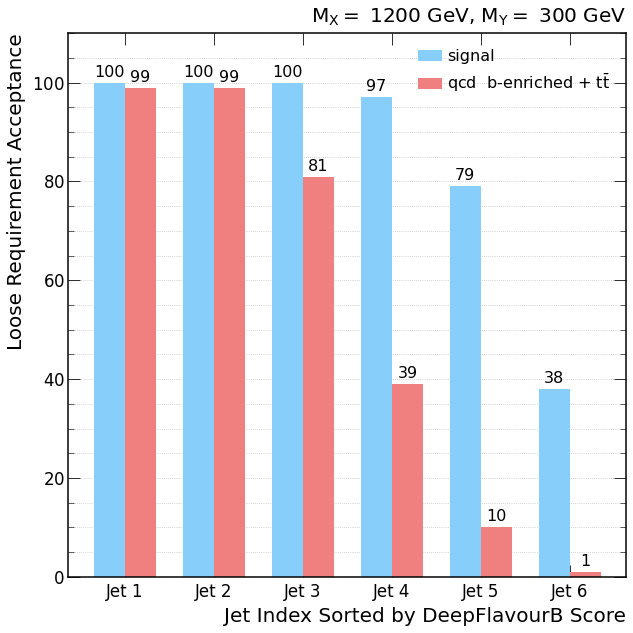

In [128]:
fig, ax = plt.subplots()

width = 0.35
x_sig = ticks - width/2
x_bkg = ticks + width/2

rects1 = ax.bar(x_sig, loose_eff_height, width=width, color='lightskyblue', zorder=2, label='signal')
rects2 = ax.bar(x_bkg, mc_loose_eff, width=width, color='lightcoral', zorder=2, label=r'qcd  b-enriched + $t\bar{t}$')

# rects = ax.bar(ticks, med_eff_height, color='lightskyblue', zorder=2)
ax.grid(axis='y', which='both')

ax.set_xlabel('Jet Index Sorted by DeepFlavourB Score')

ax.set_xticks(ticks, x_label)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

ax.bar_label(rects1, padding=3, fontsize=16)
ax.bar_label(rects2, padding=3, fontsize=16)
ax.set_ylim(0, 110)

ax.set_ylabel('Loose Requirement Acceptance')

ax.set_title(presel.sample)

ax.legend()

# ax.tick_params(axis='x', which='minor', color='C0')
fig.savefig(f'plots/2_preselections/{presel.mxmy}_loose_jet_eff.pdf')

In [37]:
score_bins = np.linspace(0,val,101)

0.39492639905488747

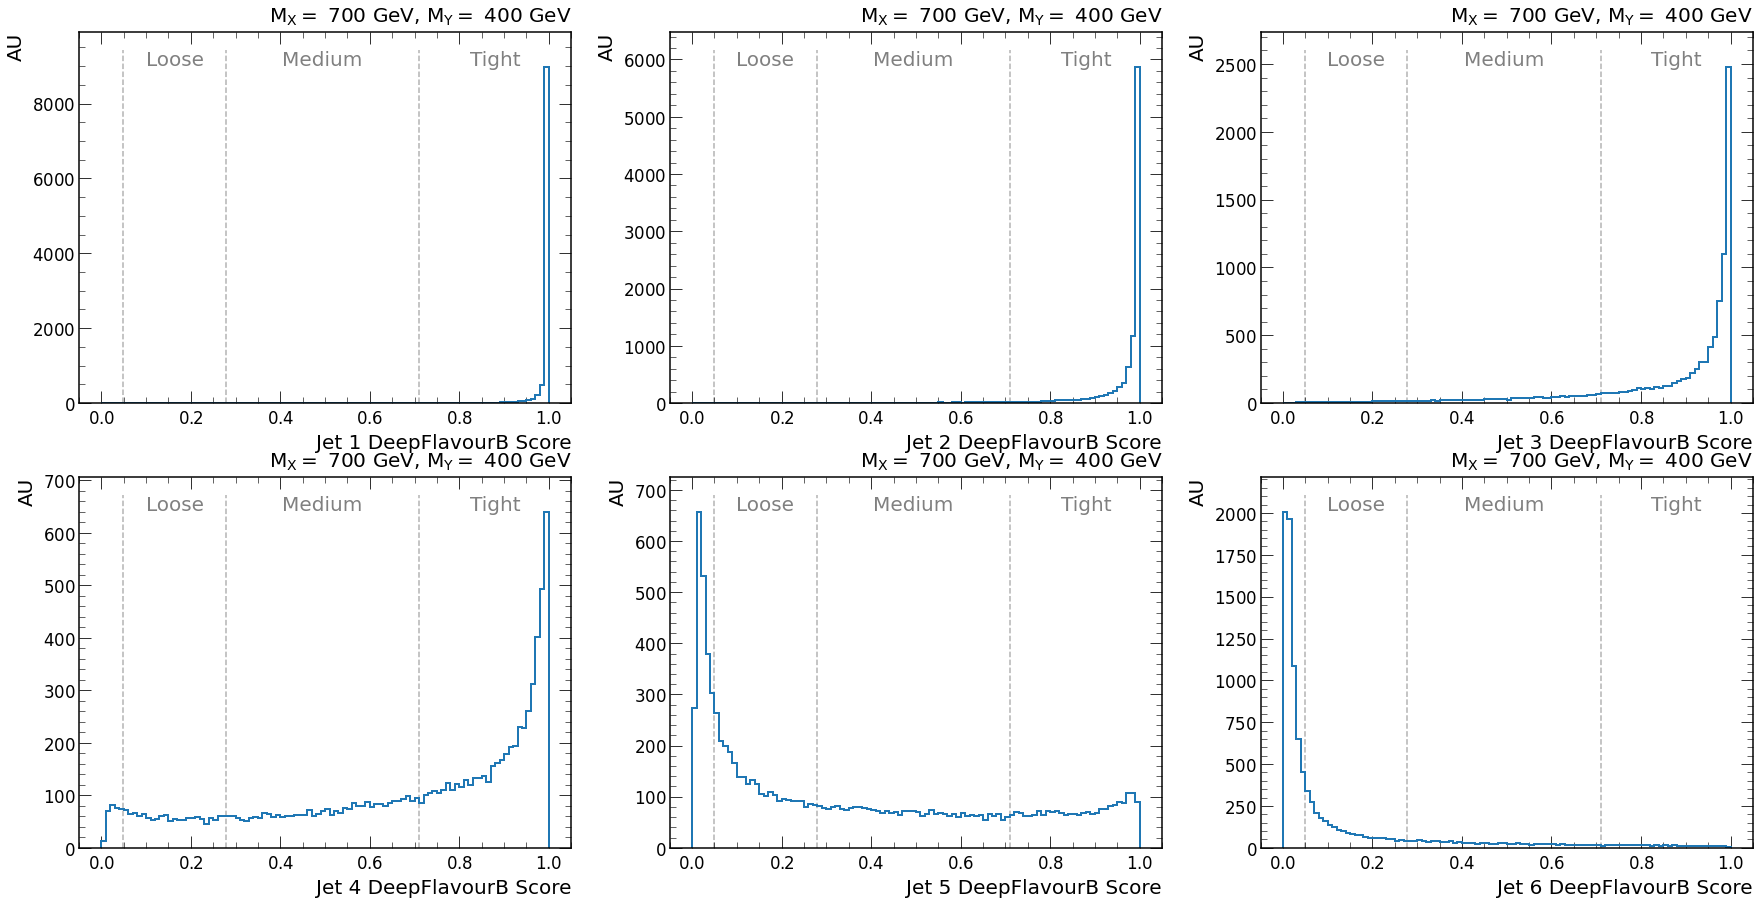

In [41]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30,15))

jet_op = ['Fail', 'Loose', 'Medium', 'Tight']
for i,ax in enumerate(axs.flatten()):
    n = tree.hist(sorted_btag[:,i], bins=score_bins, ax=ax)
    ylims = ax.get_ylim()
    xlims = ax.get_xlim()
    for j in range(1,4):
        try: x = np.average((jet_btagWP[j], jet_btagWP[j+1]))
        except: x = np.average((jet_btagWP[j], xlims[1]))

        ax.plot([jet_btagWP[j]]*2, ylims, color='k', ls='--', alpha=.3, zorder=1)
        ax.text(x, ylims[1], f'{jet_op[j]}', ha='center', va='top', color='gray')

    ax.set_xlabel(f'Jet {i+1} DeepFlavourB Score')
    ax.set_ylabel('AU')

fig.savefig(f'plots/3_hlo_reconstruction/{tree.mxmy}_btag_ordered.pdf')

n[score_bins[:-1] > jet_btagWP[1]].sum()/n.sum()

In [4]:
pt_bins = np.linspace(0,300,61)

In [22]:
id_sort = ak.argsort(tree.jet_signalId, axis=1, ascending=False)
tree.jet_signalId[id_sort]

<Array [[5, 4, 3, 2, 1, ... 1, 0, -1, -1, -1]] type='55952 * var * int32'>

In [29]:
sorted_btag = ak.sort(tree.jet_btag, axis=1, ascending=False)

In [36]:
nloose = ak.sum(tree.jet_btag > 0.0490, axis=1)
nmed = ak.sum(tree.jet_btag > 0.2783, axis=1)
ntight = ak.sum(tree.jet_btag > 0.7100, axis=1)

array([1.81949239e-01, 1.65573807e+01, 2.32895025e+02, 1.38317811e+03,
       3.40736339e+03, 5.02743941e+03])

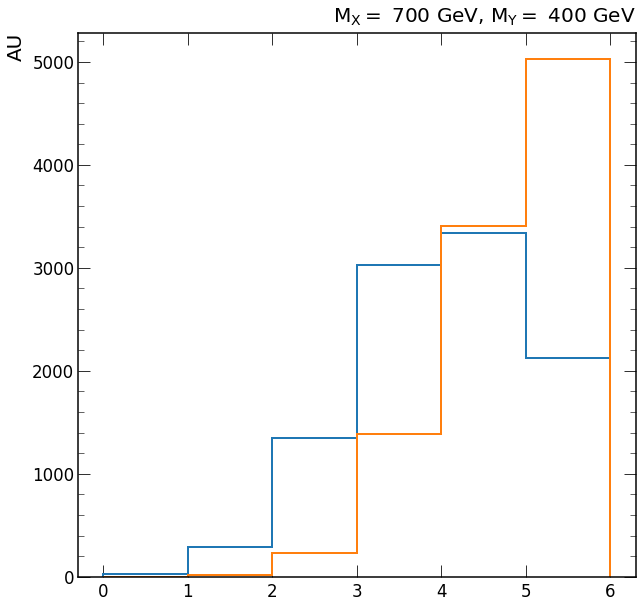

In [38]:
fig, ax = plt.subplots()

tree.hist(ntight, bins=np.arange(7), ax=ax)
tree.hist(nmed, bins=np.arange(7), ax=ax)

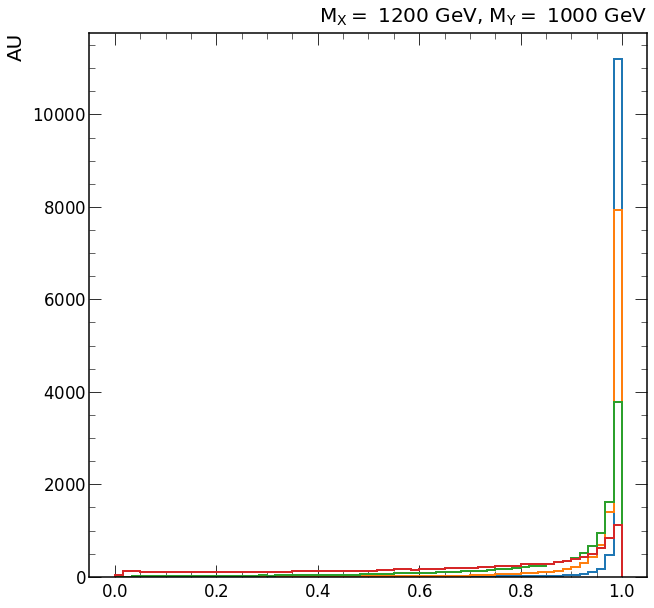

In [12]:
fig, ax = plt.subplots()

for i in range(4):
    tree.hist(sorted_btag[:,i], bins=np.linspace(0,1,61), ax=ax)
    # break

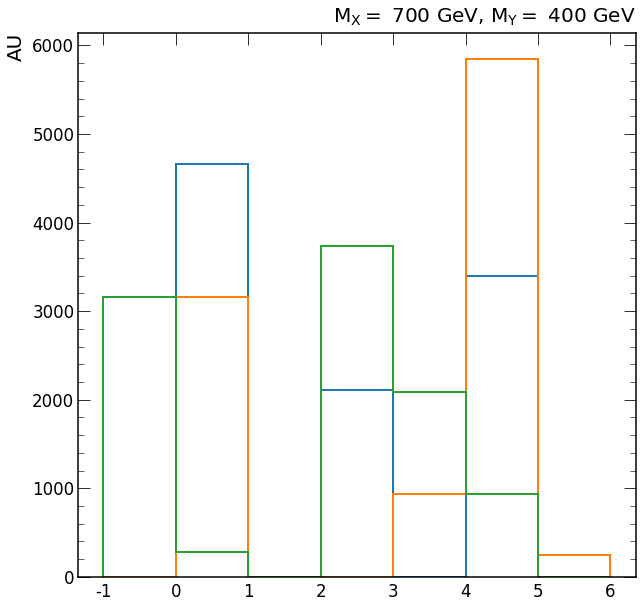

In [19]:
fig, ax = plt.subplots()

for i in range(3):
    tree.hist(tree.jet_signalId[ak.argmax(tree.jet_btag, axis=1)][:,i], bins=np.arange(-1,7), ax=ax)
    # break

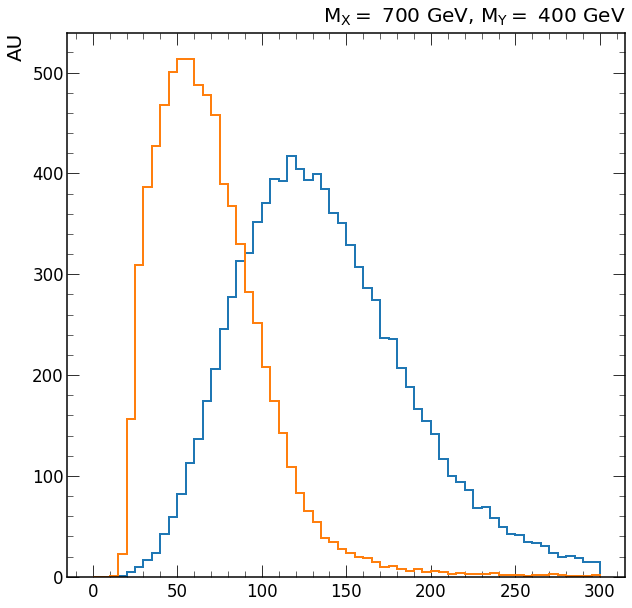

In [8]:
fig, ax = plt.subplots()

tree.hist(tree.jet_ptRegressed[tree.jet_signalId == 0], bins=pt_bins, ax=ax)
tree.hist(tree.jet_ptRegressed[tree.jet_signalId == 1], bins=pt_bins, ax=ax)

plt.show()

In [4]:
HX_mask = ak.sum((tree.jet_signalId == 0) | (tree.jet_signalId == 1), axis=1) == 2
H1_mask = ak.sum((tree.jet_signalId == 2) | (tree.jet_signalId == 3), axis=1) == 2
H2_mask = ak.sum((tree.jet_signalId == 4) | (tree.jet_signalId == 5), axis=1) == 2

In [5]:
reco_bs = []
for i in range(6):
    if i == 0 or i == 1: mask = HX_mask
    if i == 2 or i == 3: mask = H1_mask
    if i == 4 or i == 5: mask = H2_mask

    particle = Particle(kin_dict={
        'pt' : tree.jet_ptRegressed[tree.jet_signalId == i][mask],
        'eta' : tree.jet_eta[tree.jet_signalId == i][mask],
        'phi' : tree.jet_phi[tree.jet_signalId == i][mask],
        'm' : tree.jet_m[tree.jet_signalId == i][mask]
    })

    reco_bs.append(particle)

In [6]:
HX = reco_bs[0] + reco_bs[1]
H1 = reco_bs[2] + reco_bs[3]
H2 = reco_bs[4] + reco_bs[5]

HX_bb_dR = reco_bs[0].deltaR(reco_bs[1])
H1_bb_dR = reco_bs[2].deltaR(reco_bs[3])
H2_bb_dR = reco_bs[4].deltaR(reco_bs[5])

In [7]:
tree.mxmy

'MX_1200_MY_1000'

In [8]:
higgs_label = ['HX']*2 + ['H1']*2 + ['H2']*2
b_label = ['b1', 'b2']*3

In [9]:
# fig, ax = plt.subplots()

# for reco_b,h,b in zip(reco_bs,higgs_label,b_label):
#     _ = Hist(reco_b.pt, bins=np.linspace(0,600,41), ax=ax, weights=tree.scale, label=f"{h} {b}")
# # _ = Hist(H1.pt, bins=np.linspace(0,400,41), ax=ax, weights=tree.scale, label='H1')
# # _ = Hist(H2.pt, bins=np.linspace(0,400,41), ax=ax, weights=tree.scale, label='H2')

# ax.legend()

# ax.set_xlabel(r"Reco $p_T$ [GeV]")
# ax.set_ylabel('AU')

# ax.set_title(tree.sample)

# fig.savefig(f"plots/1_signal_exploration/topology/{tree.mxmy}_b_pt.pdf")

In [10]:
all_H_mask = HX_mask & H1_mask & H2_mask

In [11]:
reco_b_all_H = []
for i in range(6):
    particle = Particle(kin_dict={
        'pt' : tree.jet_ptRegressed[tree.jet_signalId == i][all_H_mask],
        'eta' : tree.jet_eta[tree.jet_signalId == i][all_H_mask],
        'phi' : tree.jet_phi[tree.jet_signalId == i][all_H_mask],
        'm' : tree.jet_m[tree.jet_signalId == i][all_H_mask]
    })

    reco_b_all_H.append(particle)

In [12]:
ak.sum(ak.flatten(reco_b_all_H[0].pt > reco_b_all_H[3].pt)) / len(reco_b_all_H[0].pt)

0.407489341163221

In [13]:
ak.sum(ak.flatten(reco_b_all_H[1].pt > reco_b_all_H[4].pt))

268

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(1.0, 1.0, '$M_X=$ 1200 GeV, $M_Y=$ 1000 GeV')

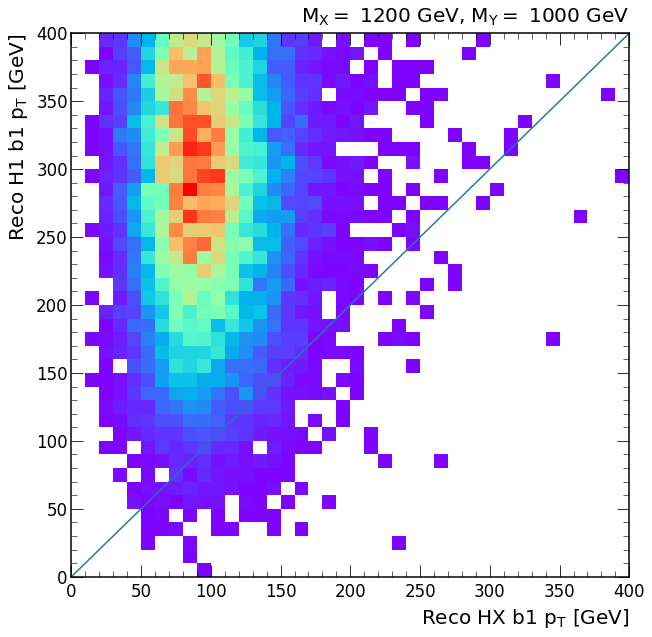

In [19]:
fig, ax = plt.subplots()

n, ex, ey, im = Hist2d(ak.flatten(reco_b_all_H[0].pt), ak.flatten(reco_b_all_H[2].pt), bins=np.linspace(0,400,41), ax=ax, weights=tree.scale)
ax.plot([0,400],[0,400])
# _ = Hist(H1.pt, bins=np.linspace(0,700,41), ax=ax, weights=tree.scale, label='H1')
# _ = Hist(H2.pt, bins=np.linspace(0,700,41), ax=ax, weights=tree.scale, label='H2')

ax.legend()

ax.set_xlabel(r"Reco HX b1 $p_T$ [GeV]")
ax.set_ylabel(r"Reco H1 b1 $p_T$ [GeV]")
# ax.set_ylabel('AU')

ax.set_title(tree.sample)

# fig.savefig(f"plots/1_signal_exploration/topology/{tree.mxmy}_H_pt.pdf")

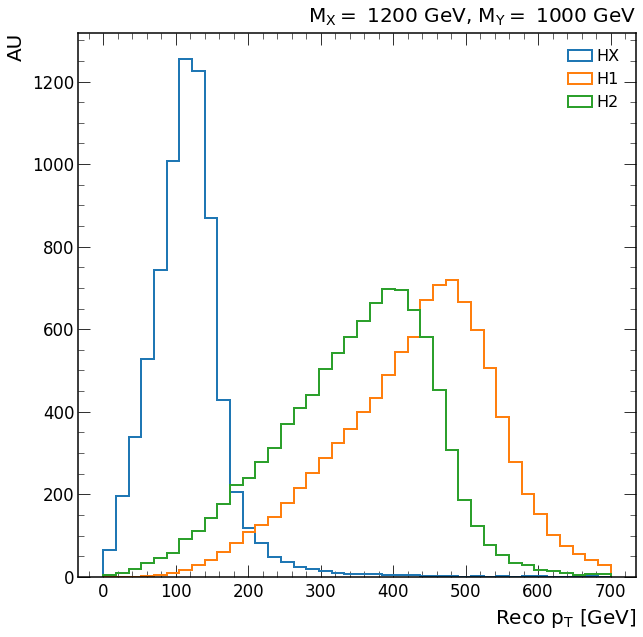

In [18]:
fig, ax = plt.subplots()

_ = Hist(HX.pt, bins=np.linspace(0,700,41), ax=ax, weights=tree.scale, label='HX')
_ = Hist(H1.pt, bins=np.linspace(0,700,41), ax=ax, weights=tree.scale, label='H1')
_ = Hist(H2.pt, bins=np.linspace(0,700,41), ax=ax, weights=tree.scale, label='H2')

ax.legend()

ax.set_xlabel(r"Reco $p_T$ [GeV]")
ax.set_ylabel('AU')

ax.set_title(tree.sample)

fig.savefig(f"plots/1_signal_exploration/topology/{tree.mxmy}_H_pt.pdf")

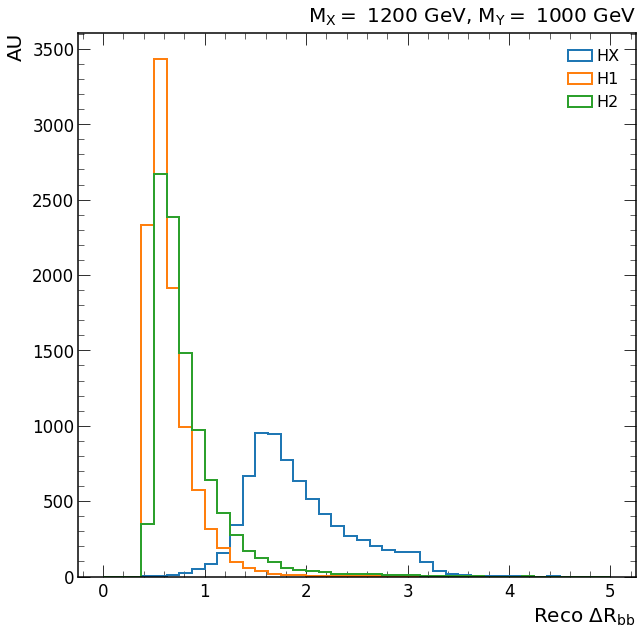

In [20]:
fig, ax = plt.subplots()

_ = Hist(HX_bb_dR, bins=np.linspace(0,5,41), ax=ax, weights=tree.scale, label='HX')
_ = Hist(H1_bb_dR, bins=np.linspace(0,5,41), ax=ax, weights=tree.scale, label='H1')
_ = Hist(H2_bb_dR, bins=np.linspace(0,5,41), ax=ax, weights=tree.scale, label='H2')

ax.legend()

ax.set_xlabel(r"Reco $\Delta R_{bb}$")
ax.set_ylabel('AU')

ax.set_title(tree.sample)

fig.savefig(f"plots/1_signal_exploration/topology/{tree.mxmy}_Hbb_dR.pdf")

In [152]:
id_sort = ak.argsort(tree.jet_signalId, axis=1)

In [187]:
pt_sort = ak.argsort(tree.jet_ptRegressed, axis=1, ascending=False)

In [190]:
pt_sorted_sigID = tree.jet_signalId[pt_sort][tree.jet_signalId[pt_sort] > -1]

In [193]:
all_sixb_mask = ak.count(pt_sorted_sigID, axis=1) == 6

In [195]:
tree.jet_ptRegressed[pt_sort][all_sixb_mask]

<Array [[141, 135, 118, ... 34.4, 27.5, 24.3]] type='17570 * var * float32'>

In [196]:
pt_sorted_sigID

<Array [[0, 4, 2, 1, 3, 5, ... [0, 4, 1, 2, 3]] type='55952 * var * int32'>

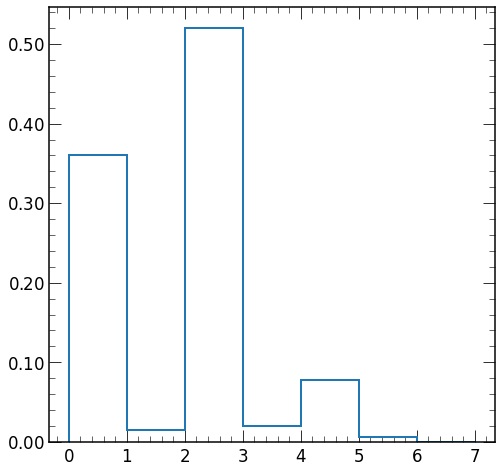

In [197]:
fig, ax = plt.subplots()

_ = Hist(pt_sorted_sigID[:,0], bins=np.arange(8), ax=ax)

In [13]:
from utils.analysis.signal import Tree, SixB

In [14]:
sixb = SixB(get_NMSSM())